# **EDA of new extraction of PubChemQC**

**Responsible** for the extraction: Vinicius Ávila

**Version**: v1

**Date of extraction**: `March 2023`

**Objective**: Make an exploratory data analysis (EDA) of the data

**Details**: available at the README file

# Importing libraries and configuration

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from rdkit import Chem
import matplotlib.pyplot as plt

In [83]:
tqdm.pandas()

In [90]:
pd.set_option('display.max_columns', None)

In [91]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(10, 5)})

# Loading data

In [4]:
df_smiles = pd.read_parquet("selected_smiles.parquet")

In [5]:
df_properties = pd.read_parquet("qm_properties.parquet")

In [7]:
df_transitions = pd.read_parquet("transitions_energies.parquet")

# EDA

## Df smiles

In [8]:
df_smiles = df_smiles.reset_index()

In [9]:
df_smiles

,cid,smiles,smiles source
0,1,CC(=O)O[C@@H](CC(=O)[O-])C[N+](C)(C)C,RDKit
1,2,CC(=O)O[C@@H](CC(=O)O)C[N+](C)(C)C,RDKit
2,3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,PubChemQC
3,4,C[C@H](O)CN,PubChemQC
4,5,NCC(=O)COP(=O)(O)O,PubChemQC
...,...,...,...
2620752,75276555,CN[C@@H](S)N/N=C(/C)c1ccccn1,PubChemQC
2620753,75277118,C=CCN(/C=C/c1ccccc1Cl)C(C)=O,PubChemQC
2620754,75277120,C=CCN(/C=C/c1ccccc1C)C(C)=O,PubChemQC
2620755,75277121,COc1ccc(/C=C/N(C)C(C)=O)c(OC)c1,PubChemQC


In [10]:
df_smiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620757 entries, 0 to 2620756
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   cid            int64 
 1   smiles         object
 2   smiles source  object
dtypes: int64(1), object(2)
memory usage: 60.0+ MB


In [11]:
df_smiles.isnull().sum()

cid              0
smiles           0
smiles source    0
dtype: int64

In [12]:
df_smiles['cid'].duplicated().sum()

0

In [13]:
df_smiles['smiles'].duplicated().sum()

119287

In [14]:
df_smiles['smiles source'].value_counts()

smiles source
PubChemQC    2365703
RDKit         255054
Name: count, dtype: int64

## Df properties

In [15]:
df_properties = df_properties.reset_index()

In [16]:
new_col_names = dict(zip(df_properties.columns,["_".join(col.split()) for col in df_properties.columns]))
new_col_names

{'cid': 'cid',
 'charge': 'charge',
 'total dipole moment': 'total_dipole_moment',
 'multiplicity': 'multiplicity',
 'homo': 'homo',
 'lumo': 'lumo',
 'gap': 'gap',
 'total energy': 'total_energy'}

In [17]:
df_properties = df_properties.rename(columns=new_col_names)

In [18]:
df_properties.head()

,cid,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy
0,1,0,12.362788,1,-4.655868,-0.302046,4.353822,-19287.579176
1,2,1,5.855433,1,-11.066870,-3.551086,7.515785,-19299.202955
2,3,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068
3,4,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860
4,5,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704


In [19]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620757 entries, 0 to 2620756
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   cid                  int64  
 1   charge               int64  
 2   total_dipole_moment  float64
 3   multiplicity         int64  
 4   homo                 float64
 5   lumo                 float64
 6   gap                  float64
 7   total_energy         float64
dtypes: float64(5), int64(3)
memory usage: 160.0 MB


In [20]:
df_properties.isnull().sum()

cid                    0
charge                 0
total_dipole_moment    0
multiplicity           0
homo                   0
lumo                   0
gap                    0
total_energy           0
dtype: int64

<Axes: title={'center': 'total_energy'}, ylabel='Frequency'>

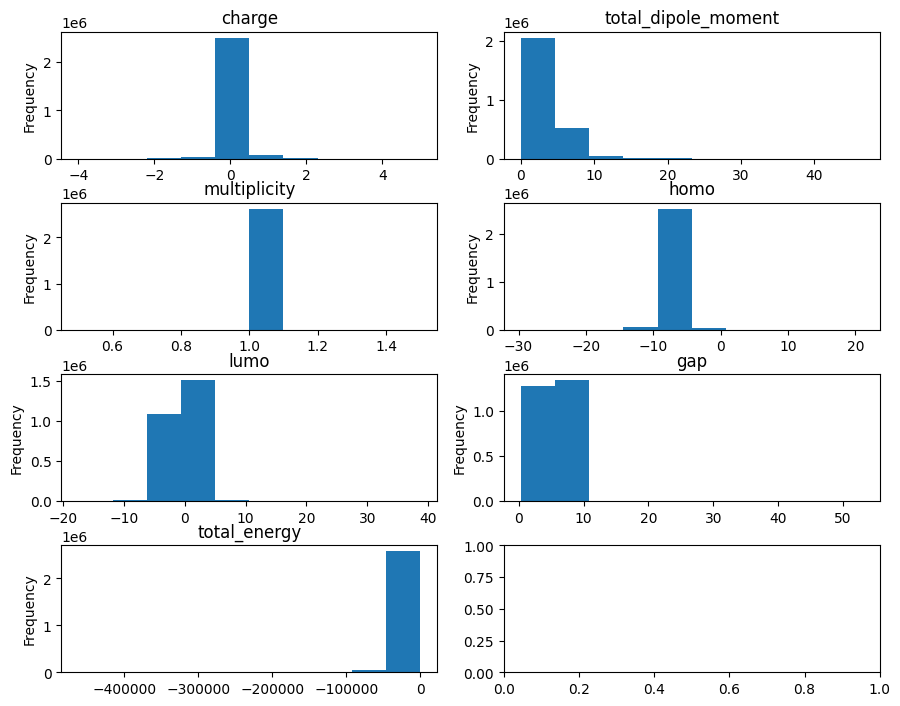

In [24]:
# PLOTS - Properties
fig, axs = plt.subplots(4,2, figsize=(9,7))
fig.tight_layout()

df_properties['charge'].plot.hist( ax=axs[0,0], title='charge')
df_properties['total_dipole_moment'].plot.hist( ax=axs[0,1], title='total_dipole_moment')
df_properties['multiplicity'].plot.hist( ax=axs[1,0], title='multiplicity')
df_properties['homo'].plot.hist( ax=axs[1,1], title='homo')
df_properties['lumo'].plot.hist( ax=axs[2,0], title='lumo')
df_properties['gap'].plot.hist( ax=axs[2,1], title='gap')
df_properties['total_energy'].plot.hist( ax=axs[3,0], title='total_energy')

## Df transitions

In [25]:
df_transitions.head()

,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,
1,32381.393970,0.002393,33414.775701,0.002229,35041.644378,0.000038,35966.609062,0.004932,37121.320776,0.000746,37641.451596,0.006370,37976.268471,0.001117,38311.230525,0.001396,40062.494092,0.003212,40525.343416,0.002180
2,46441.291104,0.000402,46825.670748,0.000412,56096.054110,0.000646,56938.129196,0.022929,57372.999148,0.000343,58598.534406,0.005652,59362.010763,0.005563,60451.940025,0.002308,62136.396688,0.025338,62379.605110,0.017436
3,32576.410766,0.053438,34937.703709,0.127298,35191.469929,0.035610,38959.724483,0.045520,45869.452080,0.002901,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,45133.600212,0.003867,50498.445390,0.022722,52102.569231,0.001101,53565.199229,0.044094,54291.396641,0.024346,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,34507.648887,0.001015,41628.443712,0.008713,45462.755074,0.001559,46943.403498,0.000598,48366.754296,0.003638,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173


In [62]:
df_transitions.describe()

,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
count,2.620757e+06,2.620755e+06,2.620753e+06,2.620751e+06,2.620753e+06,2.620751e+06,2.620749e+06,2.620747e+06,2.620745e+06,2.620744e+06,2.620742e+06,2.620742e+06,2.620740e+06,2.620740e+06,2.620740e+06,2.620740e+06,2.620740e+06,2.620740e+06,2.620726e+06,2.620726e+06
mean,3.716832e+04,4.153434e-02,4.021637e+04,4.253370e-02,4.230542e+04,3.517449e-02,4.392276e+04,3.241925e-02,4.532467e+04,3.261445e-02,4.647773e+04,3.206213e-02,4.748085e+04,3.128821e-02,4.835801e+04,3.036140e-02,4.915507e+04,2.946027e-02,4.988961e+04,2.932213e-02
std,7.073551e+03,9.768477e-02,6.667774e+03,9.054905e-02,6.374067e+03,7.248709e-02,6.114015e+03,6.722213e-02,5.939272e+03,6.867659e-02,5.811621e+03,7.022188e-02,5.716145e+03,7.091847e-02,5.650422e+03,6.667203e-02,5.600797e+03,6.385990e-02,5.562613e+03,6.285038e-02
min,1.209832e-01,0.000000e+00,2.580974e-01,0.000000e+00,4.758671e-01,0.000000e+00,7.984889e-01,0.000000e+00,1.709895e+00,0.000000e+00,1.935731e+00,0.000000e+00,6.667753e+03,0.000000e+00,6.811909e+03,0.000000e+00,6.853430e+03,0.000000e+00,7.659549e+03,0.000000e+00
25%,3.299462e+04,1.644000e-03,3.621456e+04,2.652000e-03,3.852372e+04,2.849000e-03,4.036682e+04,2.960000e-03,4.183706e+04,3.127000e-03,4.301551e+04,3.210000e-03,4.405687e+04,3.281000e-03,4.496904e+04,3.358000e-03,4.577056e+04,3.377000e-03,4.649396e+04,3.429000e-03
50%,3.759078e+04,8.088000e-03,4.025924e+04,9.693000e-03,4.223177e+04,9.586000e-03,4.372425e+04,9.633000e-03,4.503306e+04,9.768000e-03,4.609886e+04,9.650000e-03,4.703683e+04,9.576000e-03,4.787310e+04,9.582000e-03,4.864108e+04,9.488000e-03,4.935500e+04,9.522000e-03
75%,4.166095e+04,3.627500e-02,4.422633e+04,3.565400e-02,4.591872e+04,3.055700e-02,4.728726e+04,2.917800e-02,4.863215e+04,2.946200e-02,4.969888e+04,2.812200e-02,5.061786e+04,2.693200e-02,5.144464e+04,2.633400e-02,5.218750e+04,2.571900e-02,5.289661e+04,2.571200e-02
max,4.196318e+05,3.136587e+00,3.787617e+05,2.123293e+00,4.213325e+05,2.055379e+00,4.216107e+05,2.854406e+00,3.878585e+05,2.505091e+00,3.879005e+05,2.694796e+00,4.215828e+05,3.752968e+00,4.217870e+05,2.374136e+00,4.218047e+05,3.395974e+00,1.639774e+05,2.360181e+00


<Axes: title={'center': 'Mean Transition Energies'}>

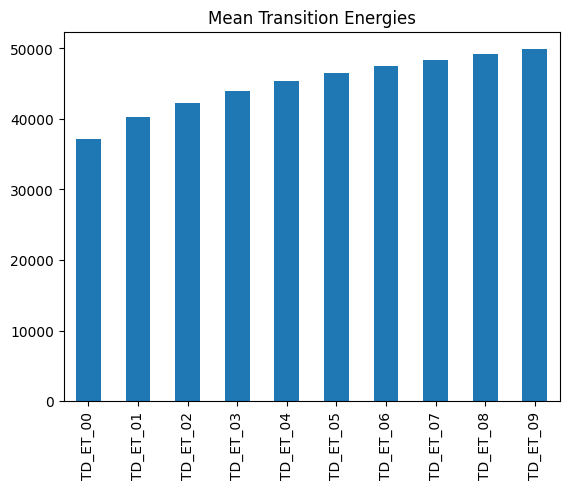

In [66]:
df_transitions[[x for x in df_transitions.columns if 'ET' in x]].describe().T['mean'].plot.bar(title='Mean Transition Energies')

<Axes: title={'center': 'Mean Oscillation Frequencies'}>

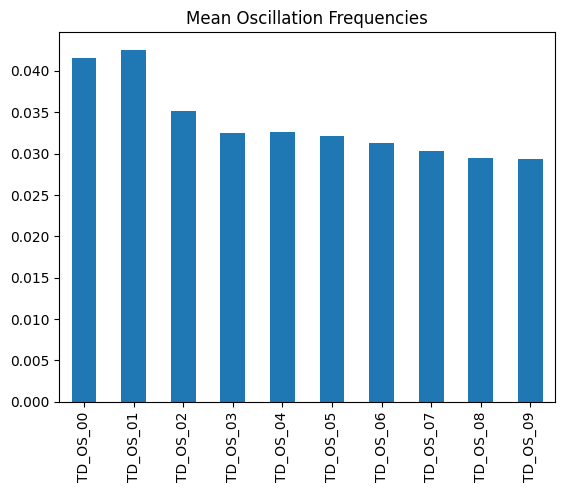

In [65]:
df_transitions[[x for x in df_transitions.columns if 'OS' in x]].describe().T['mean'].plot.bar(title='Mean Oscillation Frequencies')

In [26]:
df_transitions = df_transitions.reset_index()

In [27]:
df_transitions.shape

(2620757, 21)

In [28]:
df_transitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620757 entries, 0 to 2620756
Data columns (total 21 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cid       int64  
 1   TD_ET_00  float64
 2   TD_OS_00  float64
 3   TD_ET_01  float64
 4   TD_OS_01  float64
 5   TD_ET_02  float64
 6   TD_OS_02  float64
 7   TD_ET_03  float64
 8   TD_OS_03  float64
 9   TD_ET_04  float64
 10  TD_OS_04  float64
 11  TD_ET_05  float64
 12  TD_OS_05  float64
 13  TD_ET_06  float64
 14  TD_OS_06  float64
 15  TD_ET_07  float64
 16  TD_OS_07  float64
 17  TD_ET_08  float64
 18  TD_OS_08  float64
 19  TD_ET_09  float64
 20  TD_OS_09  float64
dtypes: float64(20), int64(1)
memory usage: 419.9 MB


In [29]:
df_transitions.isnull().sum()

cid          0
TD_ET_00     0
TD_OS_00     2
TD_ET_01     4
TD_OS_01     6
TD_ET_02     4
TD_OS_02     6
TD_ET_03     8
TD_OS_03    10
TD_ET_04    12
TD_OS_04    13
TD_ET_05    15
TD_OS_05    15
TD_ET_06    17
TD_OS_06    17
TD_ET_07    17
TD_OS_07    17
TD_ET_08    17
TD_OS_08    17
TD_ET_09    31
TD_OS_09    31
dtype: int64

<Axes: title={'center': 'TD_ET_09'}, ylabel='Frequency'>

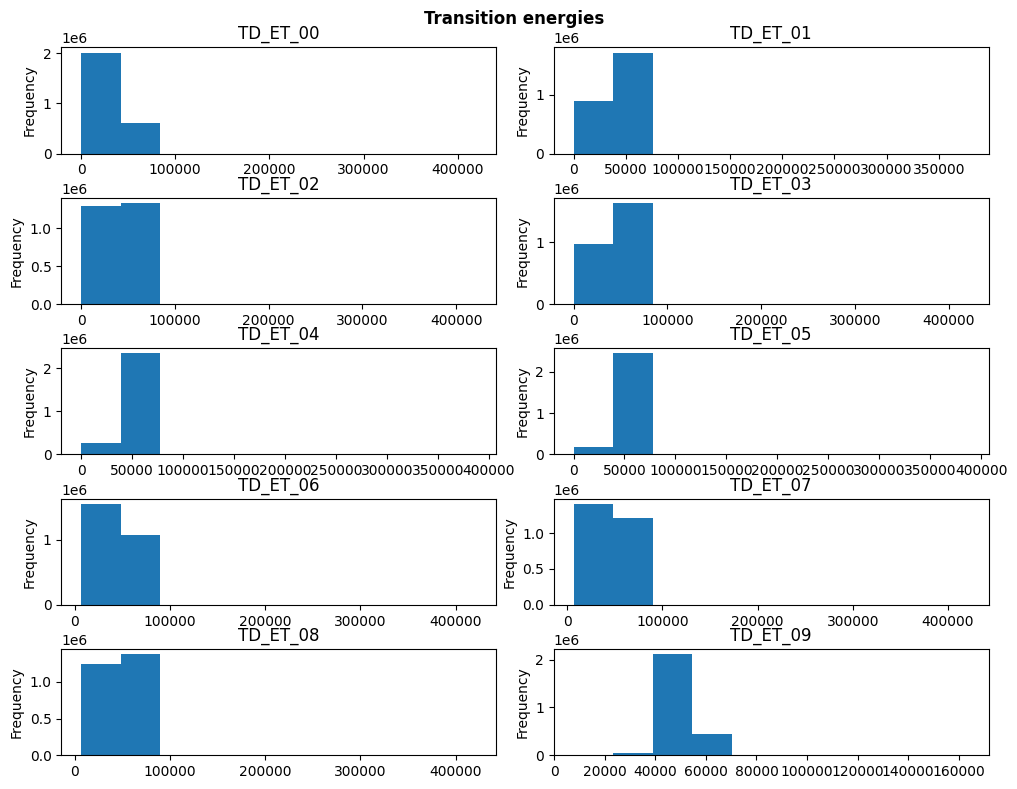

In [38]:
# PLOTS - Excitation energies
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.suptitle('Transition energies', weight ='bold')
fig.tight_layout()

df_transitions['TD_ET_00'].plot.hist(title='TD_ET_00', ax=axs[0,0])
df_transitions['TD_ET_01'].plot.hist(title='TD_ET_01', ax=axs[0,1])
df_transitions['TD_ET_02'].plot.hist(title='TD_ET_02', ax=axs[1,0])
df_transitions['TD_ET_03'].plot.hist(title='TD_ET_03', ax=axs[1,1])
df_transitions['TD_ET_04'].plot.hist(title='TD_ET_04', ax=axs[2,0])
df_transitions['TD_ET_05'].plot.hist(title='TD_ET_05', ax=axs[2,1])
df_transitions['TD_ET_06'].plot.hist(title='TD_ET_06', ax=axs[3,0])
df_transitions['TD_ET_07'].plot.hist(title='TD_ET_07', ax=axs[3,1])
df_transitions['TD_ET_08'].plot.hist(title='TD_ET_08', ax=axs[4,0])
df_transitions['TD_ET_09'].plot.hist(title='TD_ET_09', ax=axs[4,1])

<Axes: title={'center': 'TD_OS_09'}, ylabel='Frequency'>

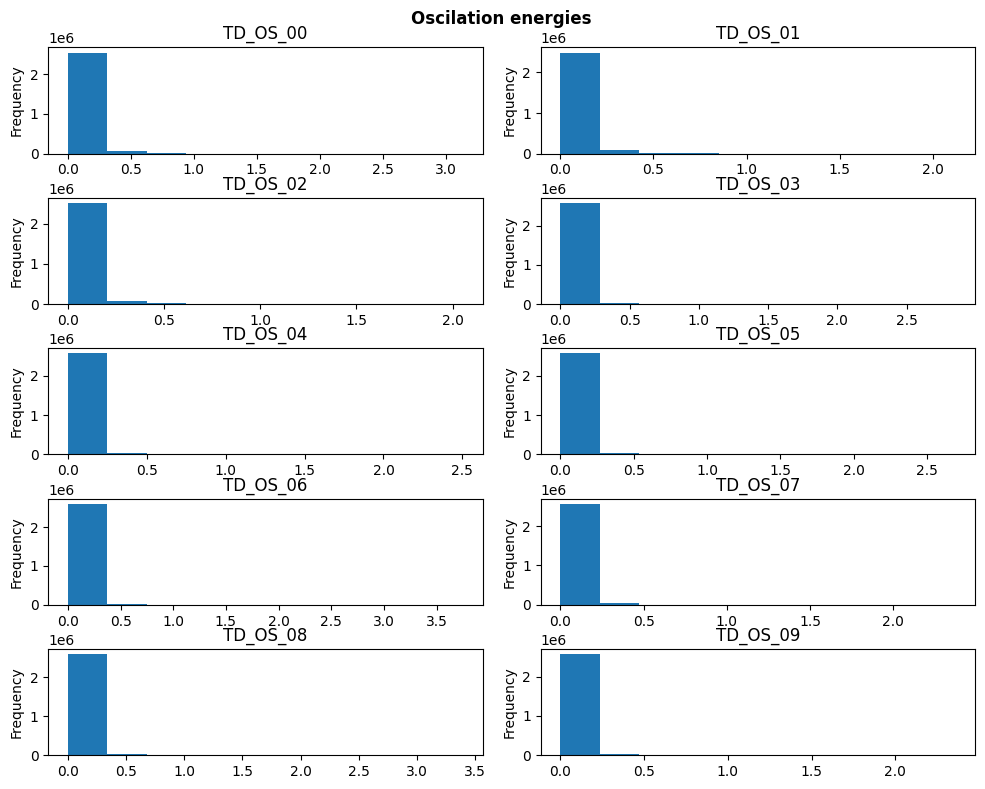

In [42]:
# PLOTS - Oscillator forces
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.suptitle('Oscilation energies', weight ='bold')
fig.tight_layout()

df_transitions['TD_OS_00'].plot.hist(title='TD_OS_00', ax=axs[0,0])
df_transitions['TD_OS_01'].plot.hist(title='TD_OS_01', ax=axs[0,1])
df_transitions['TD_OS_02'].plot.hist(title='TD_OS_02', ax=axs[1,0])
df_transitions['TD_OS_03'].plot.hist(title='TD_OS_03', ax=axs[1,1])
df_transitions['TD_OS_04'].plot.hist(title='TD_OS_04', ax=axs[2,0])
df_transitions['TD_OS_05'].plot.hist(title='TD_OS_05', ax=axs[2,1])
df_transitions['TD_OS_06'].plot.hist(title='TD_OS_06', ax=axs[3,0])
df_transitions['TD_OS_07'].plot.hist(title='TD_OS_07', ax=axs[3,1])
df_transitions['TD_OS_08'].plot.hist(title='TD_OS_08', ax=axs[4,0])
df_transitions['TD_OS_09'].plot.hist(title='TD_OS_09', ax=axs[4,1])

# Joining datasets 

per cid index

In [43]:
df_smiles = df_smiles.set_index('cid')
df_properties = df_properties.set_index('cid')
df_transitions = df_transitions.set_index('cid')

In [44]:
df_joined = df_smiles.join((df_properties.join(df_transitions, on='cid', how='left')), on='cid', how='left')

In [45]:
df_joined.head()

,smiles,smiles source,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,...,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,
1,CC(=O)O[C@@H](CC(=O)[O-])C[N+](C)(C)C,RDKit,0,12.362788,1,-4.655868,-0.302046,4.353822,-19287.579176,32381.393970,...,37641.451596,0.006370,37976.268471,0.001117,38311.230525,0.001396,40062.494092,0.003212,40525.343416,0.002180
2,CC(=O)O[C@@H](CC(=O)O)C[N+](C)(C)C,RDKit,1,5.855433,1,-11.066870,-3.551086,7.515785,-19299.202955,46441.291104,...,58598.534406,0.005652,59362.010763,0.005563,60451.940025,0.002308,62136.396688,0.025338,62379.605110,0.017436
3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,PubChemQC,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068,32576.410766,...,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,C[C@H](O)CN,PubChemQC,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860,45133.600212,...,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,NCC(=O)COP(=O)(O)O,PubChemQC,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704,34507.648887,...,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173


In [67]:
df_joined.shape

(2620757, 29)

In [68]:
df_joined.isnull().sum()

smiles                  0
smiles source           0
charge                  0
total_dipole_moment     0
multiplicity            0
homo                    0
lumo                    0
gap                     0
total_energy            0
TD_ET_00                0
TD_OS_00                2
TD_ET_01                4
TD_OS_01                6
TD_ET_02                4
TD_OS_02                6
TD_ET_03                8
TD_OS_03               10
TD_ET_04               12
TD_OS_04               13
TD_ET_05               15
TD_OS_05               15
TD_ET_06               17
TD_OS_06               17
TD_ET_07               17
TD_OS_07               17
TD_ET_08               17
TD_OS_08               17
TD_ET_09               31
TD_OS_09               31
dtype: int64

In [69]:
df_joined = df_joined.dropna()

# SMILES check

## With Hs 

In [75]:
df_joined['smiles_qtde'] = df_joined['smiles'].apply(lambda x: len(x.split(';')))
df_joined['smiles_qtde'].value_counts()

smiles_qtde
1      2620177
2          121
3           28
5           24
6           19
        ...   
230          1
127          1
51           1
120          1
449          1
Name: count, Length: 131, dtype: int64

In [79]:
df_joined[df_joined['smiles_qtde']==449]['smiles'].values

array(['[N-2][N+][N-]C(=O)/C(N=O)=C1/C=C[C@H]2C=C[CH+]C=C2[N+]1;[N-2][N-][N+]C(=O)/C(N=O)=C1/C=C[C@H]2C=C[CH+]C=C2[N+]1;N#[N+][N-]C(=O)[C-]([N+]#[O+])C1=[N+]=C2[CH-]C=C[CH-][C@@H]2C=C1;[N][N-]/N=C(\\[O-])C(=[N+]=O)C1=C[CH+][C@H]2[CH+]C=CC=C2[N-]1;[N][N+][N-]C(=O)/C([N+][O-])=C1/C=C[C@H]2[CH+]C=CC=C2[N-]1;[N][N-][N+]C(=O)/C(N=O)=C1/C=C[C@H]2[CH+]C=CC=C2[N-]1;[N-2]N=[N+]=C([O+])/C(N=O)=C1/C=C[C@H]2[CH+]C=CC=C2[N-]1;[N-2][N-][N-]C(=O)C(=[N+]=O)C1=[N+]=C2[CH+]C=C[CH+][C@@H]2C=C1;N#[N+][N-]C([O-])=C([N-][O-])C1=C[CH+][C@H]2[CH+]C=C[CH+]C2=N1;[N-2]N=NC(=O)/C([N+]#[O+])=C1/C=C[C@H]2C=C[CH+]C=C2[N-]1;[N-2][N+]#[N+]C(=O)[C+]([N+]#[O+])C1=C[CH-][C@H]2[CH-]C=CC=C2[N-]1;[N-2][N+]/N=C([O+])/C(N=O)=C1/C=C[C@H]2C=C[CH+]C=C2[N-]1;[N][N-][N-]C(=O)C(=[N+]=O)C1=NC2=CC=C[CH+][C@@H]2C=C1;[N-2][N-][N-]C(=O)[C+]([N+]#[O+])C1=C[CH-][C@H]2[CH+]C=C[CH+]C2=N1;[N-2][N+]#[N+]C([O-])=C([N+]#[O+])C1=C[CH+][C@H]2[CH-]C=CC=C2[N-]1;[N-2][N+]/N=C(\\[O-])C(=[N+]=O)C1=NC2=CC=C[CH+][C@@H]2C=C1;[N-2]N=NC(=O)/C(N=O)=C1/C=C[C

In [80]:
df_joined['1st_smile'] = df_joined['smiles'].apply(lambda x: x.split(';')[0])

In [81]:
def return_smile(smi):

    mol = Chem.AddHs(Chem.MolFromSmiles(smi))
    smi_output = Chem.MolToSmiles(mol,isomericSmiles=True)

    return smi_output

In [84]:
df_joined['test_smile'] = df_joined['1st_smile'].progress_apply(lambda x: return_smile(x))

100%|██████████| 2620726/2620726 [14:23<00:00, 3036.02it/s]


In [85]:
def similarity_check(smi1, smi2):

    if smi1 == smi2:
        result = 1

    else:
        result = 0

    return result

In [87]:
df_joined['smile_check'] = df_joined.progress_apply(lambda df_: similarity_check(df_['1st_smile'], df_['test_smile']), axis=1)

100%|██████████| 2620726/2620726 [00:35<00:00, 73191.30it/s]


In [89]:
df_joined['smile_check'].value_counts()

smile_check
0    2617980
1       2746
Name: count, dtype: int64

Supposedly, isomeric SMILES are: 

In [93]:
df_joined[df_joined['smile_check']==1][['1st_smile','test_smile']]

,1st_smile,test_smile
cid,,
259,[Br-],[Br-]
280,O=C=O,O=C=O
281,[C-]#[O+],[C-]#[O+]
299,O=C1[C@]2(Cl)[C@@]3(Cl)[C@]4(Cl)C(Cl)(Cl)[C@@]...,O=C1[C@]2(Cl)[C@@]3(Cl)[C@]4(Cl)C(Cl)(Cl)[C@@]...
312,[Cl-],[Cl-]
...,...,...
74023658,FB(F)/C(F)=C(/F)B(F)F,FB(F)/C(F)=C(/F)B(F)F
74023674,F/N=C(/F)Cl,F/N=C(/F)Cl
74029586,[H]/N=N/N=N/N=N/N=N/N=N/N=N/[H],[H]/N=N/N=N/N=N/N=N/N=N/N=N/[H]


And non-isomeric are:

In [94]:
df_joined[df_joined['smile_check']==0][['1st_smile','test_smile']]

,1st_smile,test_smile
cid,,
1,CC(=O)O[C@@H](CC(=O)[O-])C[N+](C)(C)C,[H]C([H])([H])C(=O)O[C@@]([H])(C([H])([H])C(=O...
2,CC(=O)O[C@@H](CC(=O)O)C[N+](C)(C)C,[H]OC(=O)C([H])([H])[C@]([H])(OC(=O)C([H])([H]...
3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,[H]OC(=O)C1=C([H])C([H])=C([H])[C@]([H])(O[H])...
4,C[C@H](O)CN,[H]O[C@@]([H])(C([H])([H])[H])C([H])([H])N([H]...
5,NCC(=O)COP(=O)(O)O,[H]OP(=O)(O[H])OC([H])([H])C(=O)C([H])([H])N([...
...,...,...
75276555,CN[C@@H](S)N/N=C(/C)c1ccccn1,[H]S[C@@]([H])(N([H])/N=C(\c1nc([H])c([H])c([H...
75277118,C=CCN(/C=C/c1ccccc1Cl)C(C)=O,[H]C([H])=C([H])C([H])([H])N(C(=O)C([H])([H])[...
75277120,C=CCN(/C=C/c1ccccc1C)C(C)=O,[H]C([H])=C([H])C([H])([H])N(C(=O)C([H])([H])[...


## Without Hs 

Let's us try again with no H addition:

In [107]:
def return_smile_noHs(smi):

    mol = Chem.MolFromSmiles(smi)
    smi_output = Chem.MolToSmiles(mol,isomericSmiles=True)

    return smi_output

In [108]:
df_joined['test_smile_noHs'] = df_joined['1st_smile'].progress_apply(lambda x: return_smile_noHs(x))

100%|██████████| 2620726/2620726 [25:45<00:00, 1695.85it/s]


In [109]:
df_joined['smile_check_noHs'] = df_joined.progress_apply(lambda df_: similarity_check( df_['1st_smile'], df_['test_smile_noHs']), axis=1)

100%|██████████| 2620726/2620726 [01:27<00:00, 30110.03it/s]


In [110]:
df_joined['smile_check_noHs'].value_counts()

smile_check_noHs
1    2619985
0        741
Name: count, dtype: int64

## Removing Hs 

Let's us try again removing H addition (re-using the first function):

In [111]:
df_joined['test_smile_removeH'] = df_joined['test_smile'].progress_apply(lambda x: Chem.RemoveHs(x))

  0%|          | 1/2620726 [00:00<58:47:53, 12.38it/s]


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RemoveHs(str)
did not match C++ signature:
    RemoveHs(class RDKit::ROMol mol, struct RDKit::MolOps::RemoveHsParameters params, bool sanitize=True)
    RemoveHs(class RDKit::ROMol mol, bool implicitOnly=False, bool updateExplicitCount=False, bool sanitize=True)

In [ ]:
df_joined['smile_check_removeHs'] = df_joined.progress_apply(lambda df_: similarity_check( df_['1st_smile'], df_['test_smile_removeH']), axis=1)

In [ ]:
df_joined['smile_check_removeHs'].value_counts()

In [ ]:
df_joined['smile_check_noHs'].value_counts()

In [ ]:
df_joined['smile_check'].value_counts()

# Saving

In [36]:
df_joined.to_parquet('joined_data.parquet')